# Rede Neural para previsão de vazão de água de hidrelética

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/95/Ecomp-Poli-UPE_logo.svg/1200px-Ecomp-Poli-UPE_logo.svg.png" alt="logo-poli-ecomp" width="500" height="250">

**Escola Politécnica de Pernambuco**

**Disciplina:** Redes Neurais

**Docente:** Meuser Valença

**Discentes:** Marcos Prudêncio, Eduardo Dubeux e Vinicyus Santos

**Recife, 2025**

## Definição do problema

## Preparação dos Dados

### Bibliotecas e Dataset

In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import locale
from sklearn.preprocessing import MinMaxScaler


In [102]:
# Lendo o dataset
df = pd.read_excel("Vazões_Diárias_1931_2016_RESUMIDA_FURNAS.xls")
df.head()

,Unnamed: 0,FURNAS (6)
0,NaN,NaN
1,1/jan/1931,1996.0
2,2/jan/1931,1959.0
3,3/jan/1931,1937.0
4,4/jan/1931,1837.0


In [103]:
# Dando nome as colunas
df.columns = ["Data", "Vazao"]
df.head()


,Data,Vazao
0,NaN,NaN
1,1/jan/1931,1996.0
2,2/jan/1931,1959.0
3,3/jan/1931,1937.0
4,4/jan/1931,1837.0


In [104]:
# Garantir que a coluna Data esteja no formato datetime
locale.setlocale(locale.LC_TIME, "pt_BR.UTF-8")

# Converter datas em formato "1/fev/1931"
df['Data'] = pd.to_datetime(df['Data'], format="%d/%b/%Y", errors="coerce")

print(df)

            Data    Vazao
0            NaT      NaN
1     1931-01-01  1996.00
2     1931-01-02  1959.00
3     1931-01-03  1937.00
4     1931-01-04  1837.00
...          ...      ...
31408 2016-12-27   548.79
31409 2016-12-28   526.43
31410 2016-12-29   519.20
31411 2016-12-30   518.89
31412 2016-12-31   498.37

[31413 rows x 2 columns]


### Análise Estatística

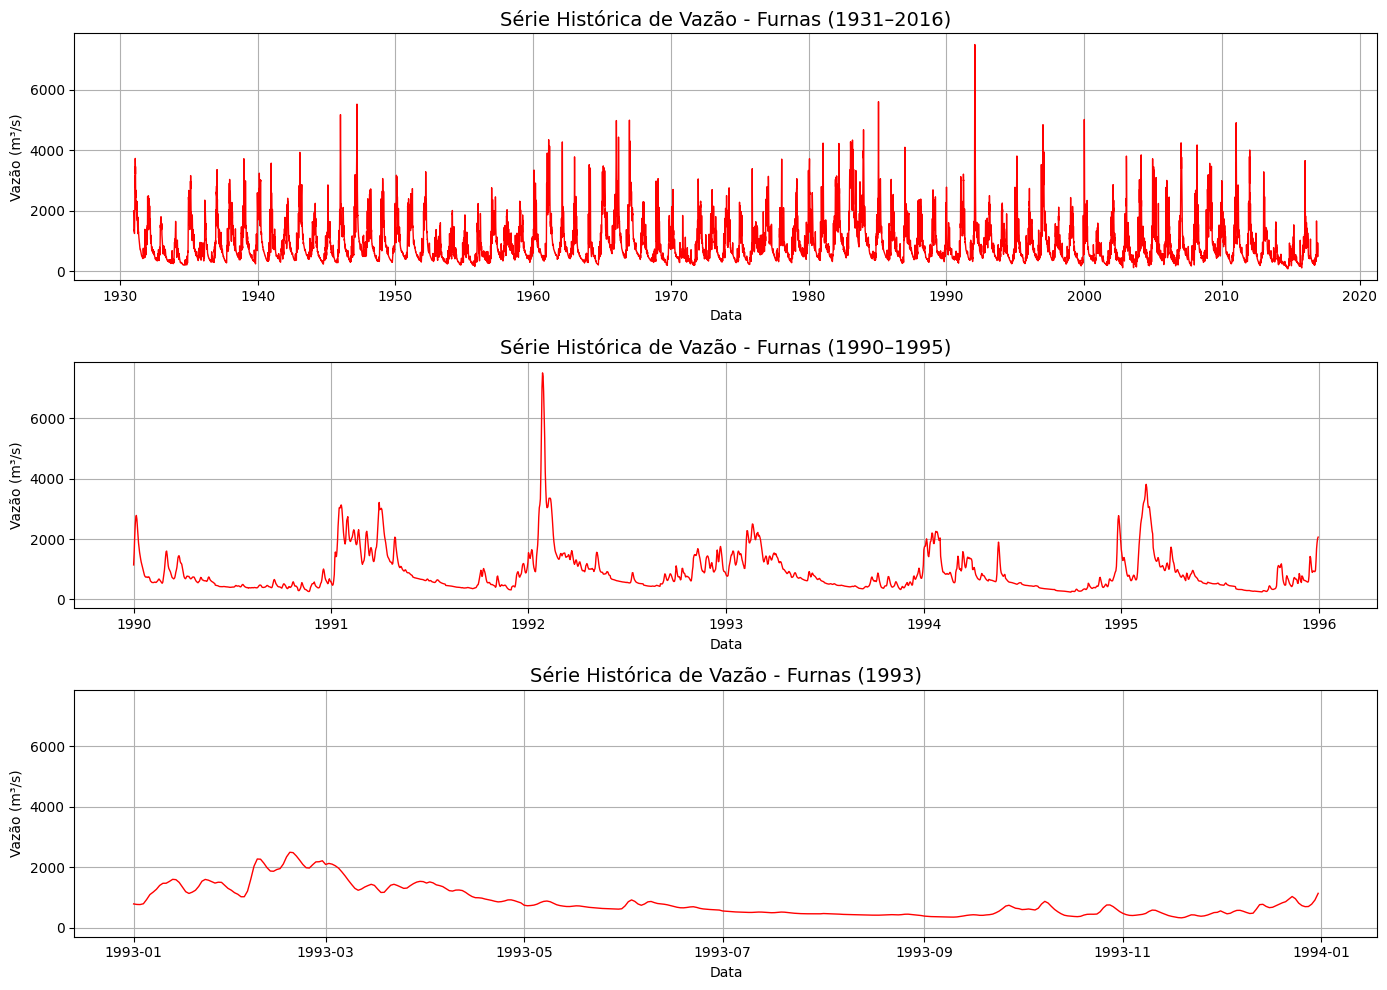

In [105]:

# Visualização geral e exemplo mais específico da série temporal
df_9095 = df[(df['Data'] >= "1990-01-01") & (df['Data'] <= "1995-12-31")]
df_93 = df[(df['Data'] >= "1993-01-01") & (df['Data'] <= "1993-12-31")]


fig, axes = plt.subplots(3, 1, figsize=(14,10), sharey=True)

axes[0].plot(df['Data'], df['Vazao'], color='red', linewidth=1)
axes[0].set_title("Série Histórica de Vazão - Furnas (1931–2016)", fontsize=14)
axes[0].set_xlabel("Data")
axes[0].set_ylabel("Vazão (m³/s)")
axes[0].grid(True)

axes[1].plot(df_9095['Data'], df_9095['Vazao'], color='red', linewidth=1)
axes[1].set_title("Série Histórica de Vazão - Furnas (1990–1995)", fontsize=14)
axes[1].set_xlabel("Data")
axes[1].set_ylabel("Vazão (m³/s)")
axes[1].grid(True)

axes[2].plot(df_93['Data'], df_93['Vazao'], color='red', linewidth=1)
axes[2].set_title("Série Histórica de Vazão - Furnas (1993)", fontsize=14)
axes[2].set_xlabel("Data")
axes[2].set_ylabel("Vazão (m³/s)")
axes[2].grid(True)


plt.tight_layout()
plt.show()

📊 Estatísticas descritivas:
count    31412.000000
mean       906.478028
std        686.152601
min         75.000000
25%        447.705000
50%        665.000000
75%       1139.000000
max       7497.000000
Name: Vazao, dtype: float64


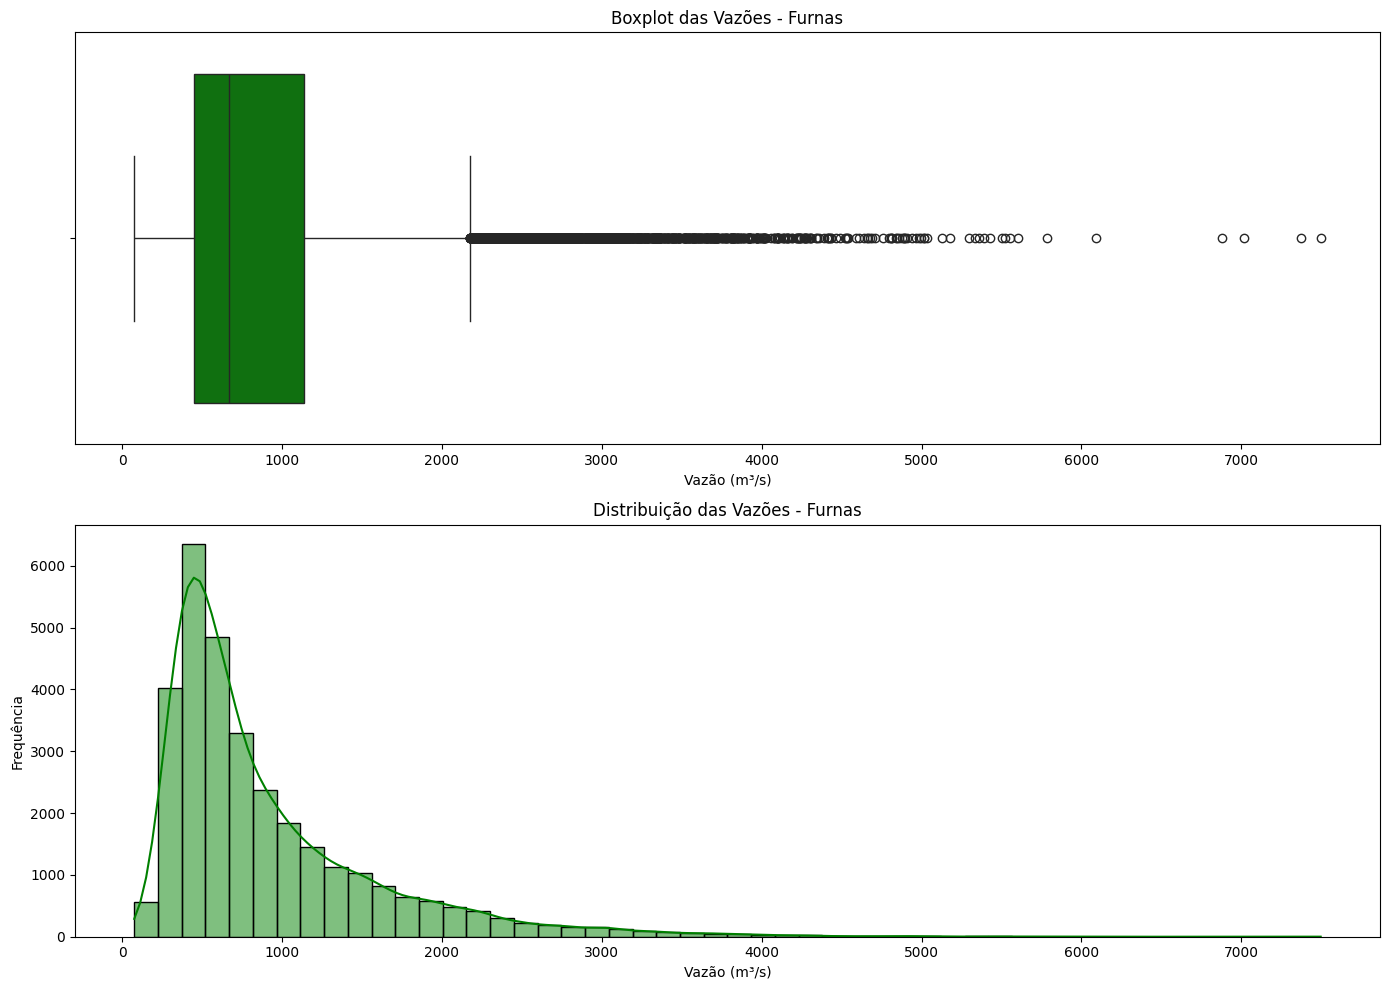

In [106]:
# Estatísticas descritivas
print("📊 Estatísticas descritivas:")
print(df['Vazao'].describe())

# Boxplot + Histograma
fig, axes = plt.subplots(2, 1, figsize=(14,10))

sns.boxplot(x=df['Vazao'], color="green", ax=axes[0])
axes[0].set_title("Boxplot das Vazões - Furnas")
axes[0].set_xlabel("Vazão (m³/s)")

sns.histplot(df['Vazao'], bins=50, kde=True, color="green", ax=axes[1])
axes[1].set_title("Distribuição das Vazões - Furnas")
axes[1].set_xlabel("Vazão (m³/s)")
axes[1].set_ylabel("Frequência")

plt.tight_layout()
plt.show()

In [107]:
print(df)


            Data    Vazao
0            NaT      NaN
1     1931-01-01  1996.00
2     1931-01-02  1959.00
3     1931-01-03  1937.00
4     1931-01-04  1837.00
...          ...      ...
31408 2016-12-27   548.79
31409 2016-12-28   526.43
31410 2016-12-29   519.20
31411 2016-12-30   518.89
31412 2016-12-31   498.37

[31413 rows x 2 columns]


### Tratamento nulos e zeros

In [108]:
# Instâncias nulas
null = df['Vazao'].isna().sum()

# Instâncias iguais a zero
zero = (df['Vazao'] == 0).sum()

print(f" Valores nulos: {null}")
print(f" Valores iguais a zero: {zero}")

 Valores nulos: 1
 Valores iguais a zero: 0


In [109]:
# Remover valores nulos
df = df.dropna(subset=['Vazao'])

null = df['Vazao'].isna().sum()

print(f" Valores nulos: {null}")

 Valores nulos: 0


In [115]:
# Normalizar dados (usando MinMaxScaler pois mantém valores entre 0 e 1, e redes neurais são mais sensíveis à escala)
scaler = MinMaxScaler()
df['Vazao'] = scaler.fit_transform(df[['Vazao']])

print(df[['Vazao']].head())


      Vazao
1  0.258825
2  0.253840
3  0.250876
4  0.237402
5  0.220695


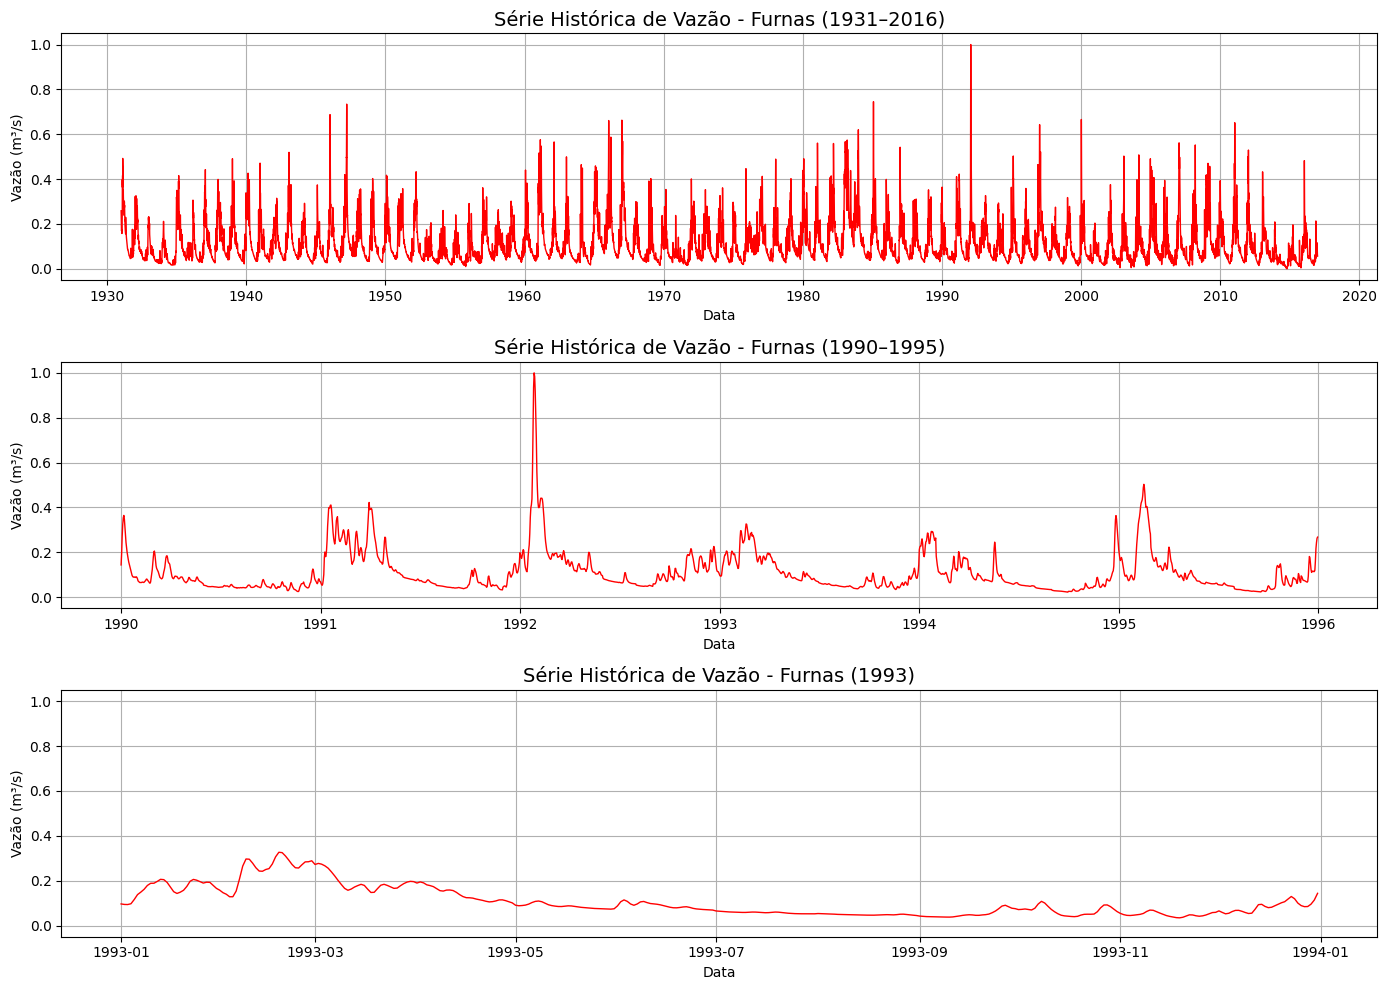

In [ ]:
# Visualização série temporam com dados normalizados
df_9095 = df[(df['Data'] >= "1990-01-01") & (df['Data'] <= "1995-12-31")]
df_93 = df[(df['Data'] >= "1993-01-01") & (df['Data'] <= "1993-12-31")]


fig, axes = plt.subplots(3, 1, figsize=(14,10), sharey=True)

axes[0].plot(df['Data'], df['Vazao'], color='red', linewidth=1)
axes[0].set_title("Série Histórica de Vazão - Furnas (1931–2016)", fontsize=14)
axes[0].set_xlabel("Data")
axes[0].set_ylabel("Vazão (m³/s)")
axes[0].grid(True)

axes[1].plot(df_9095['Data'], df_9095['Vazao'], color='red', linewidth=1)
axes[1].set_title("Série Histórica de Vazão - Furnas (1990–1995)", fontsize=14)
axes[1].set_xlabel("Data")
axes[1].set_ylabel("Vazão (m³/s)")
axes[1].grid(True)

axes[2].plot(df_93['Data'], df_93['Vazao'], color='red', linewidth=1)
axes[2].set_title("Série Histórica de Vazão - Furnas (1993)", fontsize=14)
axes[2].set_xlabel("Data")
axes[2].set_ylabel("Vazão (m³/s)")
axes[2].grid(True)


plt.tight_layout()
plt.show()

## Modelagem